In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data1 = pd.read_csv('data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


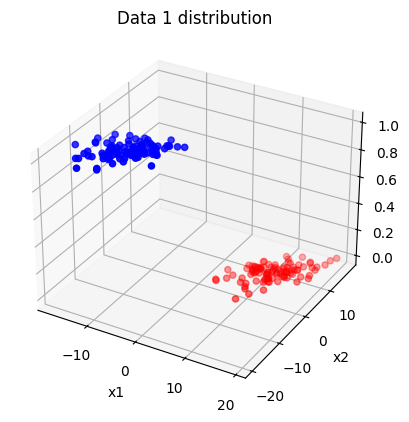

In [17]:
ax = plt.axes(projection='3d')
c_1 = ['b' if data1[2][i] else 'r' for i in range(len(data1[2]))]
ax.scatter3D(data1[0], data1[1], data1[2], c=c_1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Data 1 distribution')
plt.show()

In [19]:
data1_x = data1[[0, 1]]
data1_y = data1[2]

feats_cov = data1_x.cov()
feats_cov_inv = np.linalg.inv(feats_cov)
feats_cov_inv

array([[ 0.08031716, -0.08515476],
       [-0.08515476,  0.10144143]])

In [21]:
data1_x_0 = data1_x[data1_y == 0]
data1_x_1 = data1_x[data1_y == 1]

p_0 = len(data1_x_0) / len(data1_x)
p_1 = len(data1_x_1) / len(data1_x)

mean_0 = data1_x_0.mean()
mean_1 = data1_x_1.mean()

w = np.dot((mean_0 - mean_1), feats_cov_inv)
w_0 = np.log(p_1 / p_0) - 0.5 * np.dot(np.dot(mean_1, feats_cov_inv), mean_1) + 0.5 * np.dot(np.dot(mean_0, feats_cov_inv), mean_0)

In [26]:
pred_prob = np.dot(data1_x, w) + w_0
pred = [1 if i > 0 else 0 for i in pred_prob]

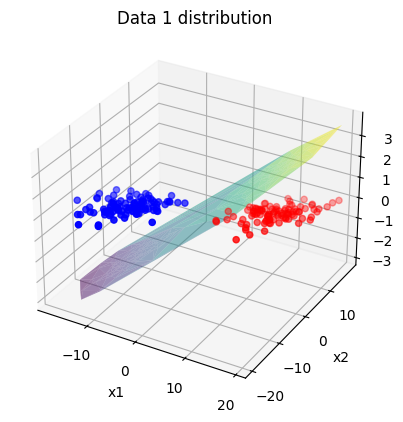

In [25]:
ax = plt.axes(projection='3d')
c_1 = ['b' if data1[2][i] else 'r' for i in range(len(data1[2]))]
ax.scatter3D(data1[0], data1[1], data1[2], c=c_1)
ax.plot_trisurf(data1[0], data1[1], pred_prob, alpha=0.5, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title('Data 1 distribution')
plt.show()